### PRICE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters


os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
register_matplotlib_converters()

#### timeit wrapper

In [3]:
def timing(f):
    def wrap(*args):
        time1 = time()
        ret = f(*args)
        time2 = time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

In [4]:
@timing
def run_func():
    print('hi')
run_func()

hi
run_func function took 3.972 ms


### import price

In [5]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_price07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_price = pd.read_csv(StringIO(csv_string))
df_price.index = df_price['Unnamed: 0']
df_price = df_price.drop('Unnamed: 0', axis=1)
df_price.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_price = df_price.T
df_price.index = pd.to_datetime(df_price.index)
print(df_price.shape)
df_price.head()

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,17.51,29.86,45.75,45.10,32.06,51.57,45.20,48.58,18.15,48.39,...,30.49,24.09,52.57,49.55,38.40,50.63,78.02,29.140,31.60,56.41
2007-01-04,17.68,29.81,46.15,45.08,31.88,52.66,46.50,48.60,18.02,48.31,...,31.21,24.09,52.91,49.23,38.22,50.09,76.55,25.493,31.33,55.38
2007-01-05,17.64,29.64,46.06,44.65,31.83,52.46,45.46,48.26,18.06,47.63,...,31.41,24.82,52.55,48.36,37.99,49.66,76.00,24.410,30.91,55.00
2007-01-08,17.86,29.93,46.90,44.92,31.99,52.59,45.30,48.57,18.03,47.56,...,31.59,24.66,53.32,48.99,37.90,48.72,76.17,24.710,31.05,56.05
2007-01-09,17.82,29.96,47.09,45.24,31.21,52.75,45.34,48.61,18.13,47.70,...,31.98,25.70,52.68,48.87,38.03,48.78,75.59,24.730,30.90,56.45


### import returns

In [6]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_returns07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_returns = pd.read_csv(StringIO(csv_string))
df_returns.index = df_returns['Unnamed: 0']
df_returns = df_returns.drop('Unnamed: 0', axis=1)
df_returns.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_returns = df_returns.T
df_returns.index = pd.to_datetime(df_returns.index)
print(df_returns.shape)
df_returns.head()

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.021587,0.000000,0.045236,-0.003095,0.003129,-0.016215,-0.006593,0.006839,0.013400,0.006657,...,0.040614,0.003750,-0.021589,-0.017839,-0.004149,-0.034884,0.020670,0.002408,0.013470,0.013462
2007-01-04,0.009709,-0.001675,0.008743,-0.000443,-0.005615,0.021136,0.028761,0.000412,-0.007162,-0.001653,...,0.023614,0.000000,0.006468,-0.006458,-0.004688,-0.010666,-0.005844,-0.114437,-0.008544,-0.018259
2007-01-05,-0.002262,-0.005703,-0.001950,-0.009539,-0.001568,-0.003798,-0.022366,-0.006996,0.002220,-0.014076,...,0.006408,0.030303,-0.006804,-0.017672,-0.003150,-0.008585,-0.007185,-0.029423,-0.012144,-0.006862
2007-01-08,0.012472,0.009784,0.018237,0.006047,0.005027,0.002478,-0.003520,0.006424,-0.001661,-0.001470,...,0.005731,-0.006446,0.014653,0.013027,-0.002369,-0.017699,0.009677,0.014021,0.005180,0.019091
2007-01-09,-0.002240,0.001002,0.004051,0.007124,-0.024383,0.003042,0.000883,0.000824,0.005546,0.002944,...,0.012346,0.042174,-0.012003,-0.002450,0.003430,0.006153,-0.000395,0.005693,-0.004510,0.014644


### what were the 5 worst trading days for each of the stocks?

In [14]:
df_returns['ORCL_ORACLE CORP'].sort_values(ascending=True)[:5]

array([-0.116558, -0.098361, -0.096882, -0.094321, -0.092593])

In [18]:
dates = df_returns.index

In [21]:
df_returns['ORCL_ORACLE CORP'].values

array([ 0.021587,  0.009709, -0.002262, ...,  0.008522, -0.003336,
        0.007363])

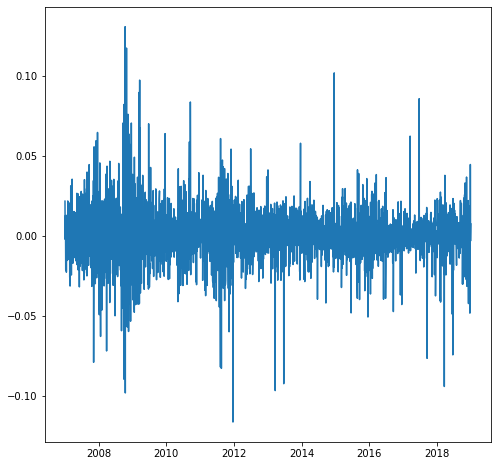

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(dates, df_returns['ORCL_ORACLE CORP'].values)

### CREATE DATAFRAME<br>ROW = STOCK SYMBOL, 10 COLUMNS (5 worst trading days of stock, 5 worst trading days of dow (repeated))

## price

### put into a slideshow? yes, probably easier

In [5]:
#%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

### I COULD ADD THE TOP 5 WORST DAY FOR EACH AND EVERY STOCK!!
### MARK THE FIRST DAY OF EVERY OTHER YEAR
### MARK THOSE POINTS IN RED


0.1160075585047404


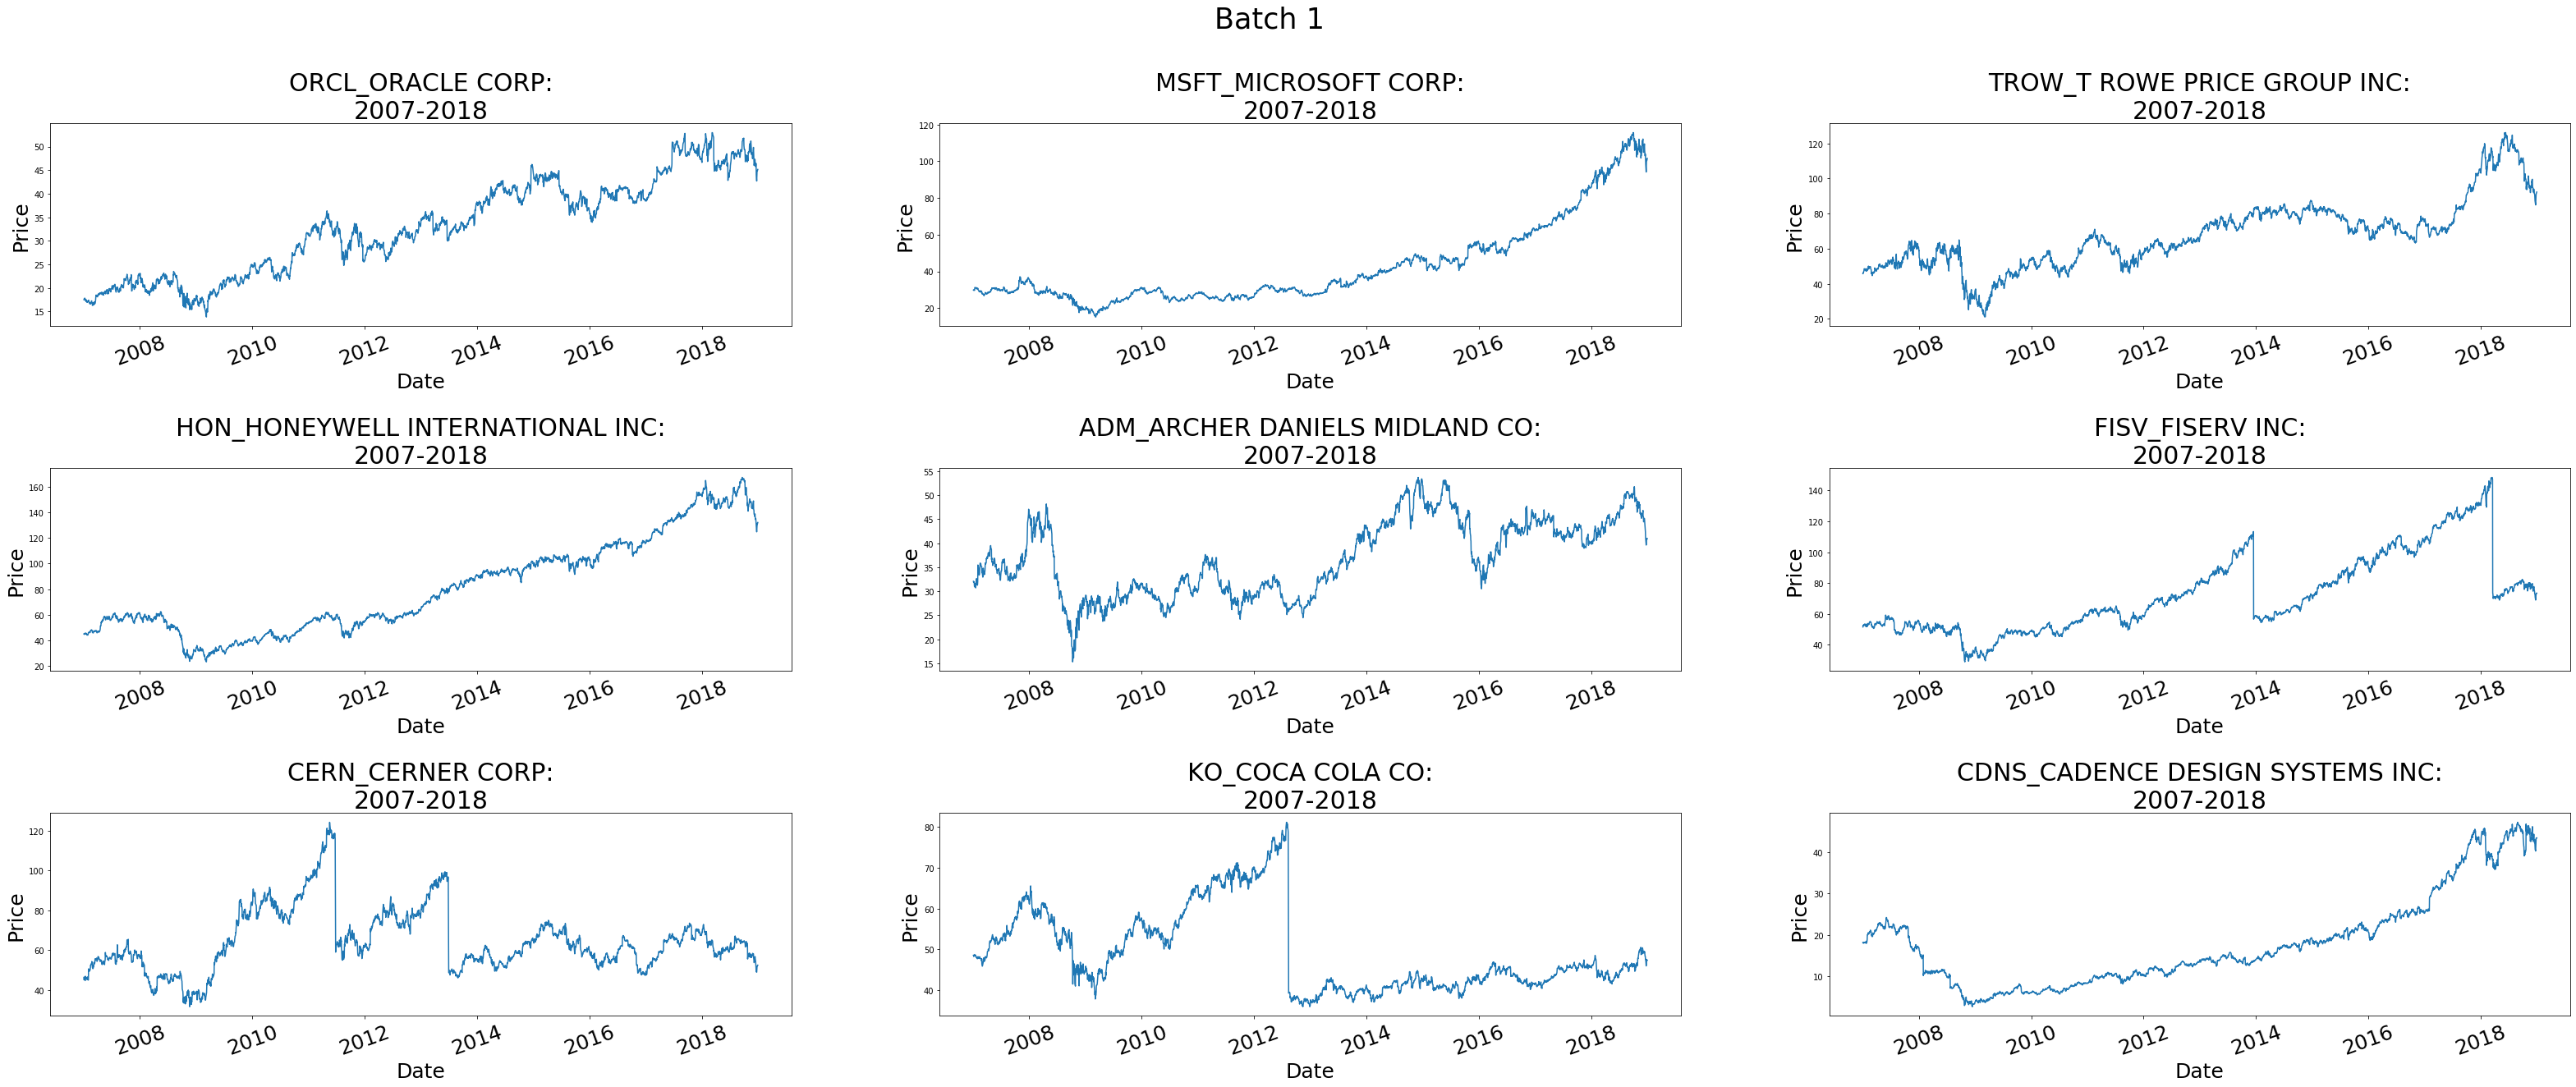

In [13]:
t0 = time()
for i in range(15):
    nn = len(df_price.columns)
    lower = i*9
    upper = (i+1)*9
    #print(lower, upper)
    temp_list = df_price.columns[lower:upper]
    ### plot the figures
    plt.figure(figsize=(55, 20))
    for k in range(len(temp_list)):
        temp_series = df_price.iloc[:, k]
        temp_name = temp_list[k]
        plt.subplot(3, 3, k+1)
        #plt.hist(temp_series, bins=20)
        plt.plot(temp_series)
        plt.title('{}:\n2007-2018'.format(temp_name), fontsize=30)
        plt.xticks(fontsize=25, rotation=20)
        plt.xlabel(xlabel='Date', fontsize=25)
        plt.ylabel(ylabel='Price', fontsize=25)
        plt.subplots_adjust(hspace=0.7)
    plt.suptitle('Batch {}'.format(i+1), fontsize=35)
    plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220)
    break
t1 = time()
print((t1-t0)/60)

In [ ]:
# temp_list1 = df_price.columns[:25]
# temp_list2 = df_price.columns[25:50]
# temp_list3 = df_price.columns[:100]
# temp_list4 = df_price.columns[:100]
# temp_list5 = df_price.columns[:100]
# temp_list6 = df_price.columns[:100]
# temp_list7 = df_price.columns[:100]
# temp_list8 = df_price.columns[:100]
# temp_list9 = df_price.columns[:100]
# temp_list10 = df_price.columns[:100]
# temp_list11 = df_price.columns[:100]
# temp_list12 = df_price.columns[:100]
# temp_list13 = df_price.columns[:100]
# temp_list14 = df_price.columns[:100]
# temp_list15 = df_price.columns[:100]
# temp_list16 = df_price.columns[:100]

In [ ]:
# plt.figure(figsize=(100,60))
# for i in range(len(temp_list)):
#     temp_series = df_price.iloc[:, i]
#     temp_name = temp_list[i]
#     plt.subplot(5, 5, i+1)
#     #plt.hist(temp_series, bins=20)
#     plt.plot(temp_series)
#     plt.title('{}: 2007-2018'.format(temp_name), fontsize=15)

# plt.savefig('testplot.png')
# plt.show()


In [ ]:
# key_list = df_price.columns

# for company in key_list[:20]:
#     fig, ax = plt.subplots()
#     ax.plot(df_price[company])
#     plt.xticks(rotation=45)
#     plt.title('{}:\nSharesout: 2000-2019'.format(company), fontsize=15)
#     plt.show()
#     print('')
#     print('')

## SEND IMAGES TO AWS